# Création d'un dataset time-series

Pour traiter les times series, on va utiliser pandas qui a été développé à l'origine pour ce type de données et qui est donc parfaitement adapté.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
occupancy = pd.read_csv("data/occupancy_training.csv")

occupancy.head()

,index,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
0,1,2015-02-04 17:51:00,23.18,27.2720,426.0,721.25,0.004793,1
1,2,2015-02-04 17:51:59,23.15,27.2675,429.5,714.00,0.004783,1
2,3,2015-02-04 17:53:00,23.15,27.2450,426.0,713.50,0.004779,1
3,4,2015-02-04 17:54:00,23.15,27.2000,426.0,708.25,0.004772,1
4,5,2015-02-04 17:55:00,23.10,27.2000,426.0,704.50,0.004757,1


On voit que ce dataset comporte une colonne date mais il n'est pas encore une dataset timesserie. On le voit quand on cherche à représenter une des données de la base. Cette représentation ne se fait pas en fonction du temps mais en fonction de l'index.

<AxesSubplot: >

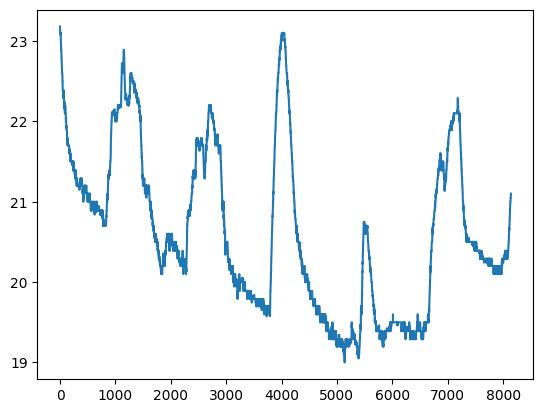

In [3]:
occupancy["Temperature"].plot()

In [4]:
occupancy.index

RangeIndex(start=0, stop=8143, step=1)

Pour obtenir un dataset TimeSeries, il faut un index de type datetime, et pour cela:
- faire de la colonne date l'Index
- dire à Pandas que cet index est de type date

In [5]:
occupancy = pd.read_csv("data/occupancy_training.csv", index_col="date", parse_dates = True)

occupancy.head()

,index,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
date,,,,,,,
2015-02-04 17:51:00,1,23.18,27.2720,426.0,721.25,0.004793,1
2015-02-04 17:51:59,2,23.15,27.2675,429.5,714.00,0.004783,1
2015-02-04 17:53:00,3,23.15,27.2450,426.0,713.50,0.004779,1
2015-02-04 17:54:00,4,23.15,27.2000,426.0,708.25,0.004772,1
2015-02-04 17:55:00,5,23.10,27.2000,426.0,704.50,0.004757,1


<AxesSubplot: xlabel='date'>

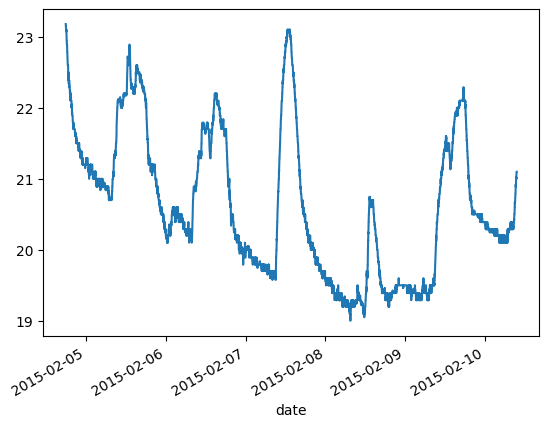

In [6]:
occupancy["Temperature"].plot()

Cet index va nous permettre de réaliser des tris efficaces sur les index

<AxesSubplot:xlabel='date'>

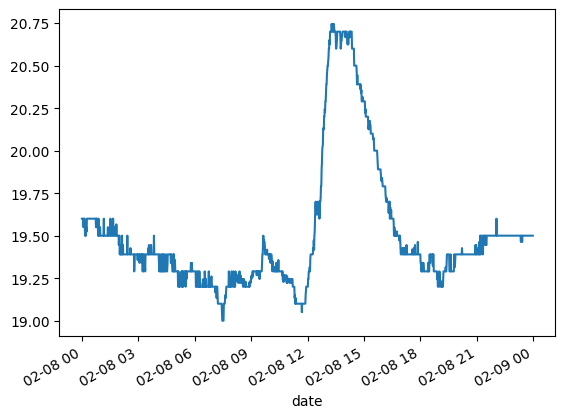

In [10]:
occupancy.loc[ "2015-02-08" ,"Temperature"].plot()

In [7]:
occupancy.loc[ "2015" ,"Temperature"] 
# et 
occupancy.loc[ "2015-02" ,"Temperature"] 

# marcheraient aussi mais sont peu interessants ici.

date
2015-02-04 17:51:00    23.18
2015-02-04 17:51:59    23.15
2015-02-04 17:53:00    23.15
2015-02-04 17:54:00    23.15
2015-02-04 17:55:00    23.10
                       ...  
2015-02-10 09:29:00    21.05
2015-02-10 09:29:59    21.05
2015-02-10 09:30:59    21.10
2015-02-10 09:32:00    21.10
2015-02-10 09:33:00    21.10
Name: Temperature, Length: 8143, dtype: float64

<AxesSubplot:xlabel='date'>

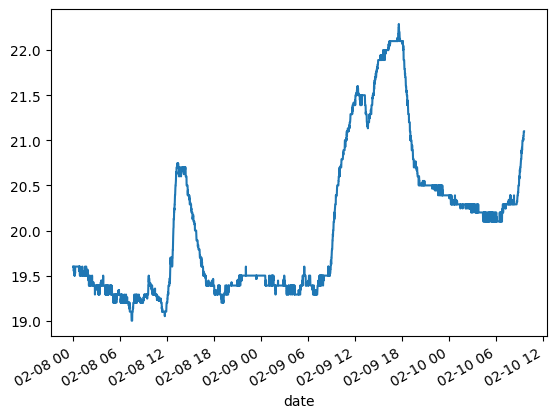

In [11]:
occupancy.loc[ "2015-02-08":"2015-02-10" ,"Temperature"].plot()

## Les séries agrégées avec resample

Jusqu'à présent, on a représenté toutes nos données, mais il est très facile de les regrouper pour obtenir des moyennes ou d'autres indicateurs selon une certaine [fréquence](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#dateoffset-objects) appelé dans pandas date offset:

date
2015-02-04    AxesSubplot(0.125,0.2;0.775x0.68)
2015-02-05    AxesSubplot(0.125,0.2;0.775x0.68)
2015-02-06    AxesSubplot(0.125,0.2;0.775x0.68)
2015-02-07    AxesSubplot(0.125,0.2;0.775x0.68)
2015-02-08    AxesSubplot(0.125,0.2;0.775x0.68)
2015-02-09    AxesSubplot(0.125,0.2;0.775x0.68)
2015-02-10    AxesSubplot(0.125,0.2;0.775x0.68)
Freq: D, Name: Temperature, dtype: object

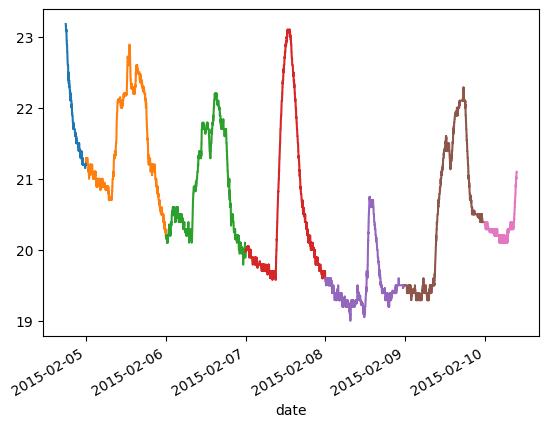

In [12]:
occupancy["Temperature"].resample("D").plot()

<AxesSubplot:xlabel='date'>

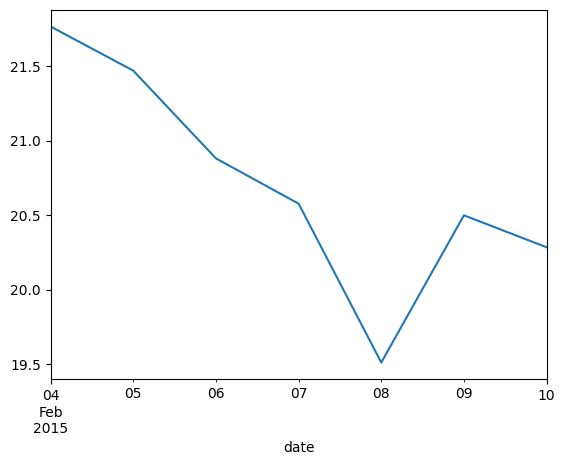

In [13]:
occupancy["Temperature"].resample("D").mean().plot()